In [1]:
# === WARNINGS ===
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# === FILES ===
path = 'C:\\Users\\liong\\Jupyter Notebook\\191020_Fourth Year Project\\Parkinson-Disease-Repository\\Data\\Patient001-2019-12-05\\'

files = ['ftap-forearm\\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-forearm\\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv',
 'ftap-wrist\\ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-wrist\\ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Gyroscope_1.4.5.csv']

In [3]:
# === PREPROCESSING DATA ===
import math

def calc_magnitude(df):
    xyz = [3, 4, 5]
    
    df['magnitude'] = df.iloc[:, xyz[0]]**2 + df.iloc[:, xyz[1]]**2 + df.iloc[:, xyz[2]]**2
    df['magnitude'] = df['magnitude'].apply(math.sqrt)
    
    return df

In [4]:
# === SIGNAL PROCESSING ===
import statistics
import numpy as np
import pandas as pd

from scipy import signal

def extract_spect(sgl, bins = 70): 
    """
    Extract the spectrograms
    """
    freqs, times, spectrogram = signal.spectrogram(sgl, fs=50.0, nperseg=bins, noverlap=bins - 1)
    df = pd.DataFrame({'time':times, 'freq':[freqs[i] for i in np.argmax(spectrogram,0)]})
    
    return df, spectrogram

def get_peaks(sgl, h = None):
    """
    Simple function to get the peaks of the signal
    
    If no minimum height is specified, the minimum height is taken to be the mean of the signal
    """
    if h is None: 
        h = statistics.mean(np.real(sgl))
        
    # Peaks index
    i_peaks = signal.find_peaks(sgl, height = h)[0]
    
    # Value of peaks
    v_peaks = []
    
    for i in i_peaks:
        v_peaks.append(sgl[i])
        
    return i_peaks, v_peaks

In [5]:
# === PLOTTING ===
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 2
ncols = 2

def plot_for_study(y, title = None):
    fig = plt.figure(figsize = (18, 5))
    
    ax1 = fig.add_subplot(nrows, ncols, 1)
    ax1.plot(y)
    
    ax2 = fig.add_subplot(nrows, ncols, 2)
    ax2 = fig.add_subplot(nrows, ncols, 3)
    ax2 = fig.add_subplot(nrows, ncols, 4)
    
    plt.show()
    
def plot(y, ypi = None, ypiv = None, hist = True, title = None):
    print(title)
    plt.figure(figsize=(8,5))
    plt.plot(y)
    plt.title(title)
    
    if ypi is not None and ypiv is not None:
        plt.plot(ypi, ypiv, 'xr')
        
    if hist is True:
        df = pd.DataFrame(y)
        df.hist()
        print(df.describe())
    
    plt.show()
    
def plot_for_study_im(df):
    True

In [6]:
# === DATA ANALYSIS ===
# Widgets
import ipywidgets as widgets

def study(df, title = None):
    """
    To study the data for truncation
    """
    # --- Title of the data being studied ---
    if title is None: 
        title = 'Unidentified data'
    
    widgetsTitle = widgets.HTML(
        value = '<b>' + title + '</b>',
        layout = widgets.Layout(
            border = 'solid 1px',
            padding = '10px'
        )
    )
    display(widgetsTitle)
    
    # Get magnitude of data
    df = calc_magnitude(df)
    
    
    # Get freq vs time variation and spectogram
    df_, spectro = extract_spect(df['magnitude'].values)
    
    plot_for_study(df['magnitude'])
    
    return True

HTML(value='<b>ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv</b>', layout=…

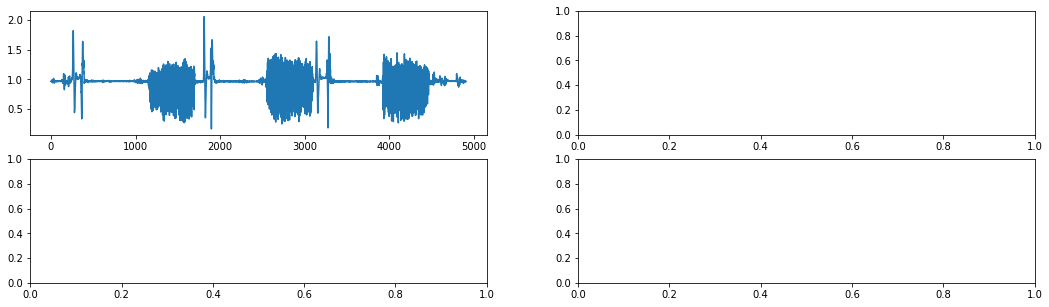

HTML(value='<b>ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv</b>', layout=Layo…

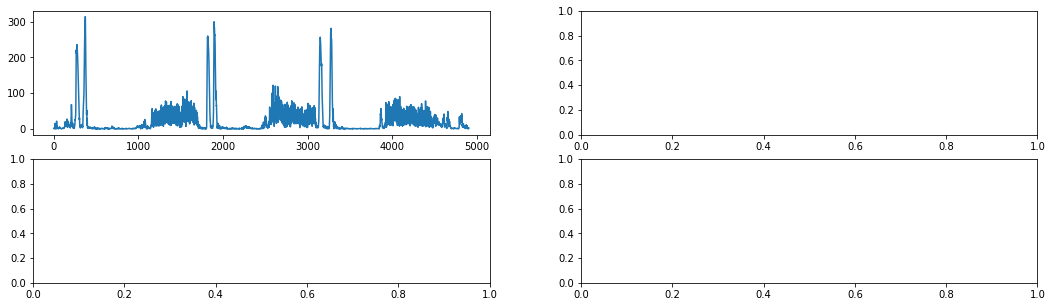

HTML(value='<b>ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Accelerometer_1.4.5.csv</b>', layout=L…

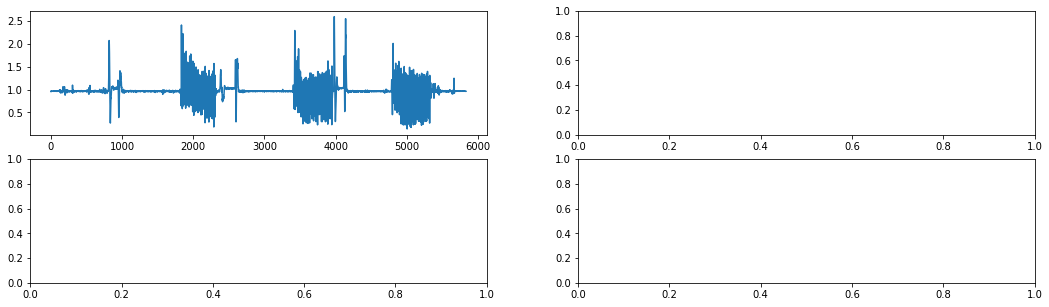

HTML(value='<b>ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Gyroscope_1.4.5.csv</b>', layout=Layou…

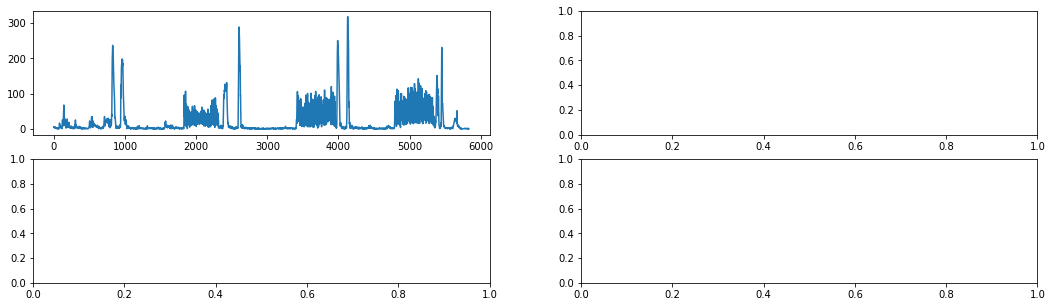

In [7]:
for file in files:
    study(pd.read_csv(path + file), title = file.split('\\')[1])

In [8]:
import matplotlib.pyplot as plt


import pandas as pd

Data ftap-forearm\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv


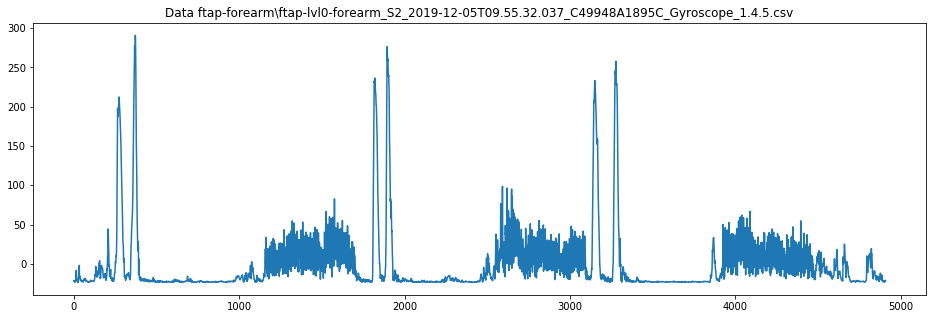

                mag
count  4.908000e+03
mean   3.270190e-14
std    4.175209e+01
min   -2.350828e+01
25%   -2.215440e+01
50%   -1.547903e+01
75%    6.996915e+00
max    2.906213e+02
Fast truncated signal  ftap-forearm\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv


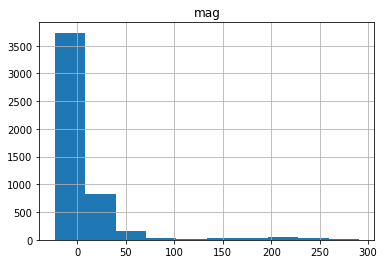

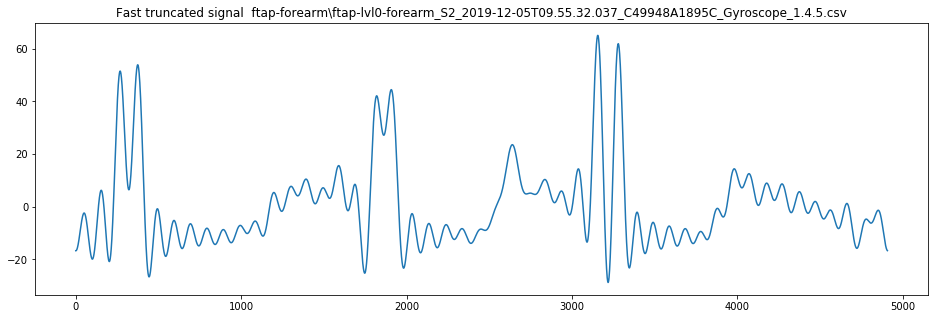

                                                   0
count                                      (4908+0j)
mean   (3.706172378862788e-16+9.26543094715697e-17j)
std                             (22.052530480501+0j)
min         (-28.735544361562155-9.960595198583949j)
25%        (-10.300537533854936+0.9836685721091261j)
50%         (-2.9197528781882767+1.514608678580391j)
75%          (5.797840840494818-0.2920598207734929j)
max            (65.0840781656758-4.571412970399328j)
Fast truncated signal (FFT)  ftap-forearm\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv


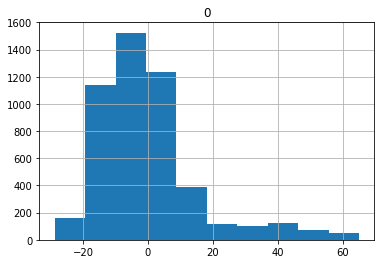

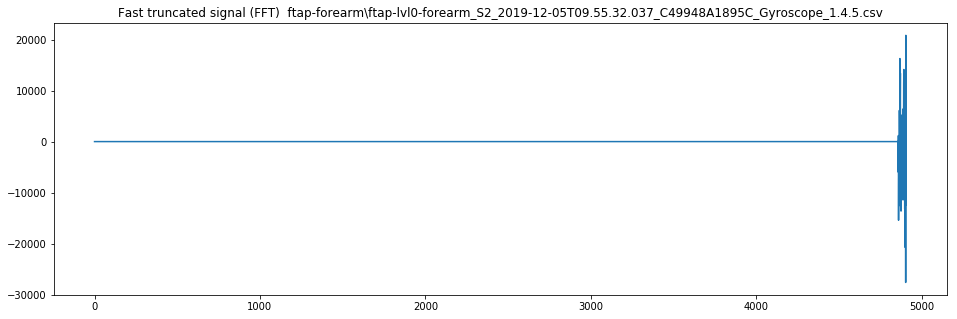

                                               0
count                                  (4908+0j)
mean   (-16.687841523633715+1.3532737350244803j)
std                      (1544.8460224832756+0j)
min     (-27628.570904338743+34067.94265535219j)
25%                                           0j
50%                                           0j
75%                                           0j
max     (20839.092612426484-12175.851431170016j)
Data ftap-wrist\ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Gyroscope_1.4.5.csv


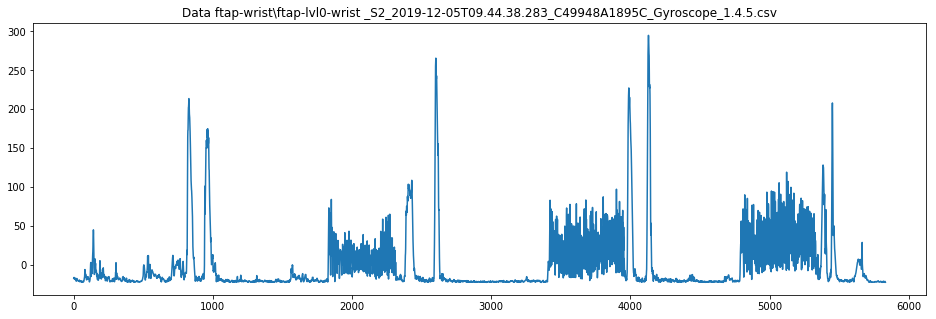

                mag
count  5.834000e+03
mean   4.632534e-14
std    3.944089e+01
min   -2.298000e+01
25%   -2.137744e+01
50%   -1.783075e+01
75%    6.417193e+00
max    2.950058e+02
Fast truncated signal  ftap-wrist\ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Gyroscope_1.4.5.csv


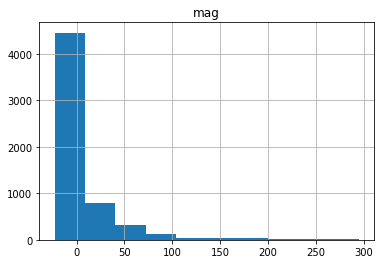

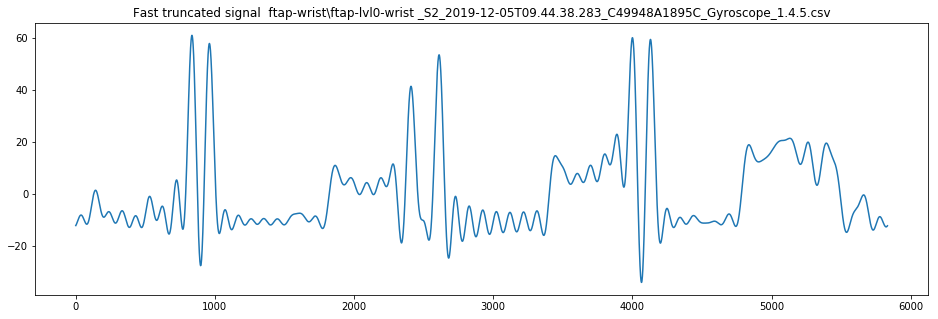

                                                      0
count                                         (5834+0j)
mean   (3.1179112162253284e-16+1.5589556081126642e-16j)
std                             (22.235960736937255+0j)
min             (-34.06420532465198-8.380948824201246j)
25%           (-10.775306178342397-0.6738971798312301j)
50%            (-7.030782840787186-3.8019743538951283j)
75%              (8.313784349261246+8.214698633878529j)
max             (61.06321726262864+2.3300358495179756j)
Fast truncated signal (FFT)  ftap-wrist\ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Gyroscope_1.4.5.csv


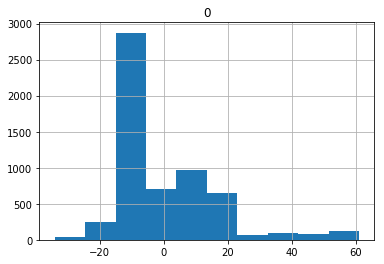

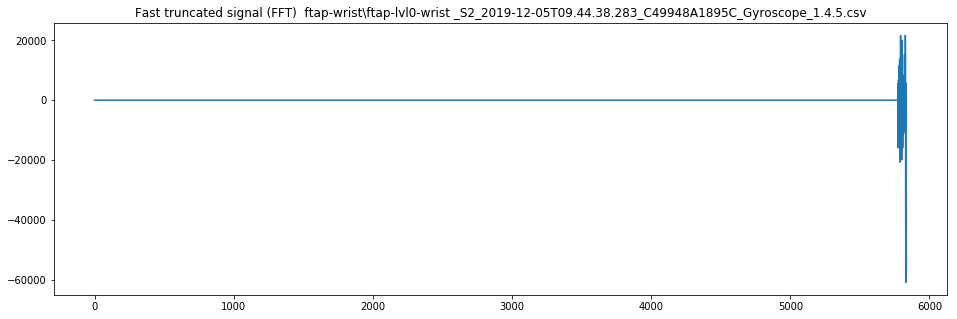

                                              0
count                                 (5834+0j)
mean   (-12.164737138098374-3.813230145602486j)
std                     (1698.3487422402304+0j)
min     (-60879.69321107546-32855.98473343302j)
25%                                          0j
50%                                          0j
75%                                          0j
max     (21660.155397598013+7461.252025283142j)


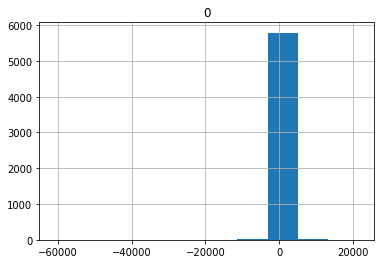

In [40]:


def plot(y, ypi = None, ypiv = None, hist = True, title = None):
    print(title)
    plt.figure(figsize=(16,5))
    plt.plot(y)
    plt.title(title)
    
    if ypi is not None and ypiv is not None:
        plt.plot(ypi, ypiv, 'xr')
        
    plt.show()
    
    if hist is True:
        try:
            df = pd.DataFrame(y)
            df.hist()
            print(df.describe())
        except:
            True
    
#     plt.show()

def test(df, describe = None):
    describe = ' ' + str(describe)
    
    import math

    df['mag'] = df.iloc[:, 3]**2 + df.iloc[:, 4]**2 + df.iloc[:, 5]**2
    df['mag'] = df['mag'].apply(math.sqrt)
    df['mag'] = df['mag'] - df.describe().loc['mean', 'mag']

    from scipy import signal
    import numpy as np

    freqs, times, spectrogram = signal.spectrogram(df['mag'].values, fs=50.0, nperseg=70, noverlap=70-1)
    df_ = pd.DataFrame({'time':times, 'freq':[freqs[i] for i in np.argmax(spectrogram,0)]})

    spec_mean = []

    spec_temp = [list(i) for i in zip(*spectrogram)]

    for sf in range(len(spec_temp)): 
        weighted_mean = 0

        for i in range(len(spec_temp[sf])):
            val = spec_temp[sf][i]
#             val *= (i + 1)
            
            weighted_mean += val

        weighted_mean /= len(spec_temp[sf])

        spec_mean.append(weighted_mean)

    spec_mean_fft = np.fft.fft(spec_mean)
    spec_mean_fft_dup =[]
    
    for i in spec_mean_fft:
        spec_mean_fft_dup.append(i)
    
    try:
#         for i in range(len(spec_mean_fft)):    
#             spec_mean_fft[i + 25] = 0
        for i in range(100):
            spec_mean_fft[i] = 0
    except:
        True
 
    mean_of_spec_mean = statistics.mean(spec_mean)
        
    spec_mean_peaks_i, spec_mean_peaks_ival = get_peaks(spec_mean, mean_of_spec_mean)
    
    spec_mean_fft_peaks_i, spec_mean_fft_peaks_ival = get_peaks(spec_mean_fft)
#     spec_mean_fft_peaks_i = signal.find_peaks(spec_mean_fft)[0]
#     spec_mean_fft_peaks_ival = []
    
#     for i in spec_mean_fft_peaks_i:
# #         print(i)
# #         try:
#             spec_mean_fft_peaks_ival.append(spec_mean_fft[i])
# #         except:
# #             print(i)

# #     print(spec_mean_fft_peaks_i)
# #     print(len(spec_mean_fft_peaks_ival))

    spec_mean_ifft = np.fft.ifft(spec_mean_fft)
    
    spec_mean_ifft_peaks_i, spec_mean_ifft_peaks_ival = get_peaks(spec_mean_ifft)
    
    sgl_fft = np.fft.fft(df['mag'])
    for i in range(int(len(sgl_fft) * 0.99)):
        sgl_fft[i] = 0
    sgl = np.fft.ifft(sgl_fft)
    
    # =====================
    import matplotlib.pyplot as plt
    import plotly.graph_objects as go

    %matplotlib inline

    lim = 200

    plot(df.iloc[:, 6], title = 'Data' + describe)
    
    plt.figure(figsize=(16,5))
    plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
    plt.show()

    plot(spec_mean, spec_mean_peaks_i, spec_mean_peaks_ival, title = 'Spectrogram mean' + describe)

    spec_mean_fft_dup = spec_mean_fft_dup[0:lim]
    plot(spec_mean_fft_dup, title = 'FFT' + describe)
    
    plot(spec_mean_ifft, spec_mean_ifft_peaks_i, spec_mean_ifft_peaks_ival, title = 'Inverse truncated FFT' + describe)
    
    spec_mean_fft = spec_mean_fft[0:lim]
    plot(spec_mean_fft, spec_mean_fft_peaks_i, spec_mean_fft_peaks_ival, title = 'Truncated FFT' + describe)
    
    plot(sgl, title = 'Fast truncated signal ' + describe)
    plot(sgl_fft, title = 'Fast truncated signal (FFT) ' + describe)
    
#     plt.figure(figsize=(16,5))
#     plt.plot(time, df.iloc[:, 6])
#     plt.show()

#     plt.figure(figsize=(16,5))
#     plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
#     plt.show()

#     plt.figure(figsize=(16,5))
#     plt.plot(spec_mean)
#     plt.plot(spec_mean_peaks_i, spec_mean_peaks_ival, 'xr')
#     plt.show()
    
#     print(pd.DataFrame(spec_mean).describe())
#     pd.DataFrame(spec_mean).hist()
    
#     spec_mean_fft_dup = spec_mean_fft_dup[0:200]
#     plt.figure(figsize=(16,5))
#     plt.plot(spec_mean_fft_dup)
# #     plt.plot(spec_mean_fft_peaks_i, spec_mean_fft_peaks_ival, 'xr')
#     plt.show()   

#     plt.figure(figsize=(16,5))
#     plt.plot(spec_mean_ifft)
#     plt.plot(spec_mean_ifft_peaks_i, spec_mean_ifft_peaks_ival, 'xr')
#     plt.show()

#     spec_mean_fft = spec_mean_fft[0:200]
#     plt.figure(figsize=(16,5))
#     plt.plot(spec_mean_fft)
#     plt.plot(spec_mean_fft_peaks_i, spec_mean_fft_peaks_ival, 'xr')
#     plt.show()   

a = [0, 1]
a = [0, 1, 2, 3]
a = [1, 3]

for i in a:
    df = pd.read_csv(path + files[i])
    test(df, describe=files[i])
    for j in range(126): 
        print('=', end='')
    print()

In [37]:
True

True